<a href="https://colab.research.google.com/github/Mqondisi-Mavuso/community_detection/blob/main/410921348_HW3_Fortune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Name**: Mqondisi Fortune Mavuso
## **Student ID**: 410921348
## **Course**: Social Networks & Recommender Systems

## **Homework 3**: Community Detection

## 1. Import Libraries and Load Data

I started by importing the necessary Python libraries, such as pandas for data handling, networkx for graph analysis, and matplotlib.pyplot for visualizations. I loaded the node and edge data from the provided CSV files into a graph representation using the networkx library.

In [18]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

nodeListPath = "/content/drive/MyDrive/NDHU/112_Fall_Semester/Social_Networking_Recomender_System/Homework/HW3/nodelist.csv"
edgeListPath = "/content/drive/MyDrive/NDHU/112_Fall_Semester/Social_Networking_Recomender_System/Homework/HW3/edgelist.csv"
# Load data
nodelist = pd.read_csv(nodeListPath)
edgelist = pd.read_csv(edgeListPath)

# Create a graph
G = nx.from_pandas_edgelist(edgelist, 'Source', 'Target')

##2. Draw the Graph
To visualize the graph, I used the matplotlib library to draw a spring layout of the nodes and edges. This provides a clear representation of the network structure.

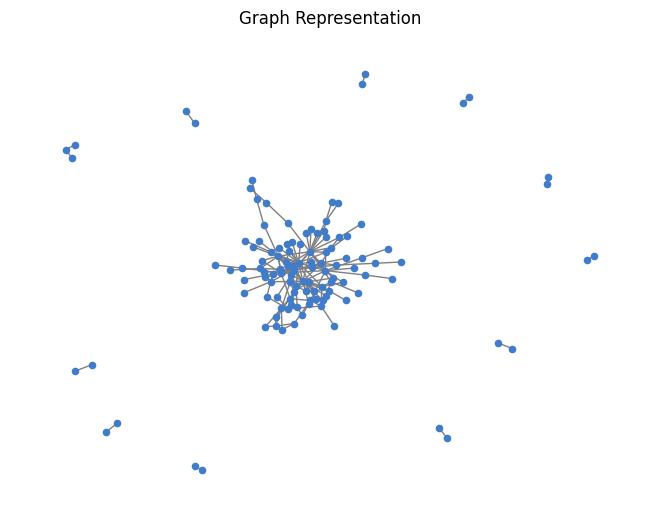

In [23]:
# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=20, node_color='#407cc9', edge_color="gray")
plt.title('Graph Representation')
plt.show()

## 3. Calculate Eigenvector Centrality and Katz Centrality


I calculated the eigenvector centrality and Katz centrality measures for each node in the graph. Eigenvector centrality identifies nodes with influence based on their connections, while Katz centrality extends this by considering the influence of nodes connected to a node.

In [24]:
# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
print("Eigenvector Centrality:", eigenvector_centrality)

# Katz Centrality
katz_centrality = nx.katz_centrality(G)
print("Katz Centrality:", katz_centrality)


Eigenvector Centrality: {'George Keith': 0.18384690867915346, 'Robert Barclay': 0.0515053715043734, 'Benjamin Furly': 0.18785206346916503, 'Anne Conway Viscountess Conway and Killultagh': 0.024995365498222864, 'Franciscus Mercurius van Helmont': 0.05053532554047185, 'William Penn': 0.2703220115399868, 'George Fox': 0.4491750710859923, 'George Whitehead': 0.2497455334914196, 'William Bradford': 0.06812170326615952, 'James Parnel': 0.03109481243243453, 'Stephen Crisp': 0.040856371188243465, 'Peter Collinson': 0.006998347503803876, 'John Bartram': 0.006998347503803876, 'James Logan': 0.04447446026748654, 'Joseph Wyeth': 0.023938569252885723, 'Thomas Ellwood': 0.17608142535843851, 'Alexander Skene of Newtyle': 8.138875606113617e-16, 'Lilias Skene': 8.138875606113617e-16, 'Dorcas Erbery': 0.0455839862351594, 'James Nayler': 0.33529741004478675, 'William Mucklow': 0.06106681323567699, 'William Dewsbury': 0.11057869321157117, 'Edward Burrough': 0.23147427604862292, 'John Crook': 0.13271581268

##4. Community Detection Using Greedy Modularity
I applied the greedy modularity algorithm to identify communities within the graph. This algorithm aims to maximize the modularity of the network by grouping nodes with dense connections.

In [25]:
# Greedy Modularity Communities
communities = list(nx.community.greedy_modularity_communities(G))
print("Communities:", communities)


Communities: [frozenset({'Peter Collinson', 'John Bartram', 'Isabel Yeamans', 'James Logan', 'David Lloyd', 'Tace Sowle', 'William Bradford', 'Anne Conway Viscountess Conway and Killultagh', 'William Penn', 'Thomas Story', 'Richard Claridge', 'Edward Haistwell', 'Jane Sowle', 'George Keith', 'Joseph Besse', 'Isaac Norris', 'Samuel Bownas'}), frozenset({'Anthony Pearson', 'Richard Farnworth', 'Robert Rich', 'Elizabeth Leavens', 'George Fox the younger', 'William Tomlinson', 'Francis Howgill', 'Margaret Fell', 'Gervase Benson', 'James Nayler', 'Martha Simmonds', 'Dorcas Erbery', 'Hannah Stranger', 'Thomas Lower', 'William Gibson', 'Thomas Aldam', 'Thomas Holme'}), frozenset({'William Crouch', 'Mary Prince', 'John Crook', 'William Coddington', 'John Perrot', 'William Mead', 'Leonard Fell', 'Mary Fisher', 'Elizabeth Hooten', 'Thomas Salthouse', 'William Dewsbury', 'George Fox', 'William Mucklow', 'Ellis Hookes', 'Edward Burrough'}), frozenset({'George Whitehead', 'Lewis Morris', 'Richard H

##5. Draw the Graph with Communities
To visualize the communities, I assigned different colors to nodes within the same community and used a colormap for better differentiation.

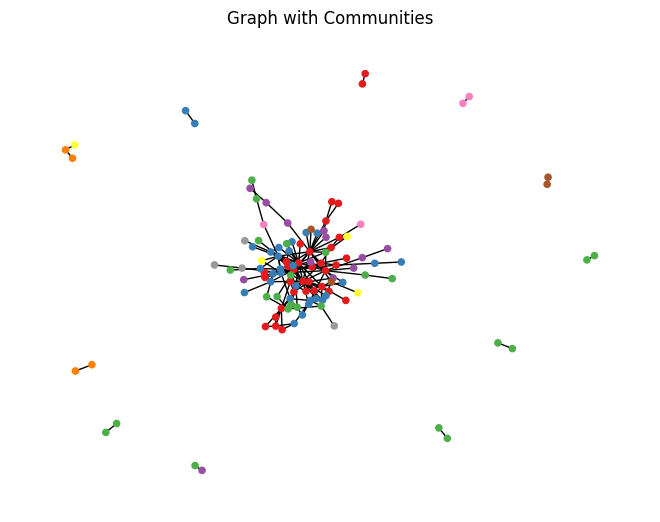

In [29]:
# Draw the Graph with Communities
colors = [i for i, comm in enumerate(communities) for _ in comm]
nx.draw(G, pos, node_color=colors, with_labels=False, cmap=plt.cm.Set1, node_size=20)
plt.title('Graph with Communities')
plt.show()


##6. Highest Eigenvector Centrality Nodes in the Largest Community
I identified the largest community and then found nodes within that community with the highest eigenvector centrality. This provides insights into the most influential nodes within the largest community.

In [30]:
# Find the largest community
largest_community = max(communities, key=len)

# Find nodes with highest Eigenvector Centrality in the largest community
highest_eigenvector_nodes = max(largest_community, key=lambda node: eigenvector_centrality[node])
print("Nodes with highest Eigenvector Centrality in the largest community:", highest_eigenvector_nodes)


Nodes with highest Eigenvector Centrality in the largest community: William Penn


## 7. Assess Modularity and Label Propagation
I calculated the modularity of the partitioned communities using the nx.community.modularity function. Additionally, I applied label propagation to compare another community detection approach.

In [31]:
# Modularity
modularity = nx.community.modularity(G, communities)
print("Modularity:", modularity)

# Label Propagation
label_propagation_communities = list(nx.community.label_propagation_communities(G))
print("Label Propagation Communities:", label_propagation_communities)


Modularity: 0.6021601268331347
Label Propagation Communities: [{'Anthony Pearson', 'Richard Farnworth', 'William Coddington', 'George Fox the younger', 'Gilbert Latey', 'Leonard Fell', 'William Bradford', 'Anne Conway Viscountess Conway and Killultagh', 'William Penn', 'Francis Howgill', 'William Mucklow', 'Mary Penington', 'Margaret Fell', 'Ellis Hookes', 'William Crouch', 'George Whitehead', 'Gervase Benson', 'Richard Hubberthorne', 'Hannah Stranger', 'Joseph Wyeth', 'Alice Curwen', 'George Keith', 'Thomas Lower', 'Rebecca Travers', 'Isaac Norris', 'Edward Burrough', 'John Crook', 'William Rogers', 'William Mead', 'John Story', 'Isabel Yeamans', 'William Dewsbury', 'Thomas Salthouse', 'George Fox', 'Tace Sowle', 'Thomas Curtis', 'Thomas Ellwood', 'John Penington', 'James Nayler', 'Martha Simmonds', 'Dorcas Erbery', 'John Perrot', 'Edward Haistwell', 'Thomas Story', 'Jane Sowle', 'William Simpson', 'John Whitehead', 'Elizabeth Hooten', 'Thomas Aldam'}, {'John Swinton', 'Robert Barclay